In [1]:
import pandas as pd

In [3]:
df=pd.read_excel('Data/Iris.xls')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x=df.drop(['iris'], axis=1)

In [6]:
from sklearn.cluster import KMeans

In [8]:
from scipy.spatial.distance import cdist

In [10]:
import numpy as np

In [16]:
dist=[]
K=range(1,10)
for k in K:
    model=KMeans(n_clusters=k).fit(x)
    dist.append(sum(np.min(cdist(x, model.cluster_centers_,'euclidean'), axis=1)))

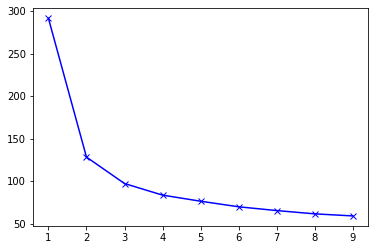

In [17]:
import matplotlib.pyplot as plt
plt.plot(K, dist,'bx-')
plt.show()

In [19]:
## choosing k=3
kmeans=KMeans(n_clusters=3).fit(x)
center=kmeans.cluster_centers_
labels=kmeans.labels_

In [20]:
df['Group']=pd.Series(labels)
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,Group
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [23]:
center

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [22]:
X_test = np.array([[4.7, 3.2, 1.5, 0.4], [4.8, 3.5, 4.5,1.6], [6.1, 3.5, 5.7,2]])
y_test=kmeans.predict(X_test)

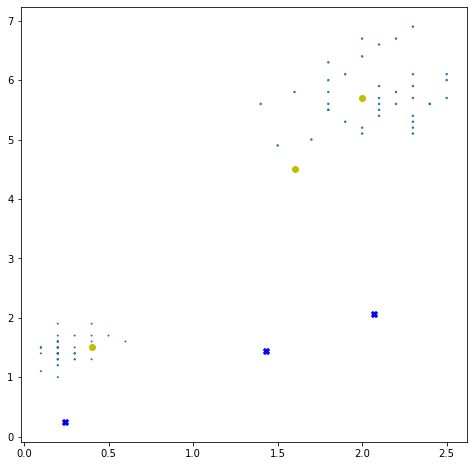

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(center[:,3], center[:,3], marker='X', c='b')
plt.scatter(df.petalwidth,df.petallength, df.Group)
plt.scatter(X_test[:,3], X_test[:,2], c='y')
plt.show()
